# Practic examples of SysTool Plot Module

### Importing the main module...

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

from main.systool import plot
import pandas as pd
import geopandas as gpd

### <span style="color:blue">**hist**</span>

This function is responsible to plot histogram graphics based on user defined parameters.

First, lets import a DataFrame to be used...

In [2]:
df = pd.read_csv(r'examples_databases\hist\si-log-2020.csv', encoding='latin1', sep=';')
df.head()

,Nº_boletim,data_boletim,Nº_municipio,nome_municipio,seq_logradouros,Nº_logradouro,tipo_logradouro,nome_logradouro,tipo_logradouro_anterior,nome_logradouro_anterior,Nº_bairro,nome_bairro,tipo_bairro,descricao_tipo_bairro,Nº_imovel,Nº_imovel_proximo
0,2020-060939318-001,19/12/2020 15:10,1,BELO HORIZONTE,1,117712,RUA,JOAO ARANTES ...,RUA,CINQUENTA E UM ...,808,UNIAO ...,B,BAIRRO,0,0
1,2020-005366112-001,31/01/2020 15:27,1,BELO HORIZONTE,1,117712,RUA,JOAO ARANTES ...,RUA,CINQUENTA E UM ...,808,UNIAO ...,B,BAIRRO,341,0
2,2020-040388513-001,21/08/2020 13:14,1,BELO HORIZONTE,2,117712,RUA,JOAO ARANTES ...,RUA,CINQUENTA E UM ...,645,CIDADE NOVA ...,B,BAIRRO,0,0
3,2020-029371860-001,19/06/2020 12:04,1,BELO HORIZONTE,1,117712,RUA,JOAO ARANTES ...,RUA,CINQUENTA E UM ...,645,CIDADE NOVA ...,B,BAIRRO,0,0
4,2020-054108200-001,09/11/2020 14:08,1,BELO HORIZONTE,1,117712,RUA,JOAO ARANTES ...,RUA,CINQUENTA E UM ...,808,UNIAO ...,B,BAIRRO,25,0


In [3]:
# Now, lets make a pivot table to quantify the number of acidents by the city street type.

df = pd.pivot_table(df, values='Nº_boletim', index='tipo_logradouro', aggfunc='count')
df.head(20)

,Nº_boletim
tipo_logradouro,
ACS,1
ALA,37
AVE,5183
BEC,29
EST,8
PCA,76
ROD,951
RUA,7812
TRE,32


With this data, now we can create an histogram with the number of acidents!

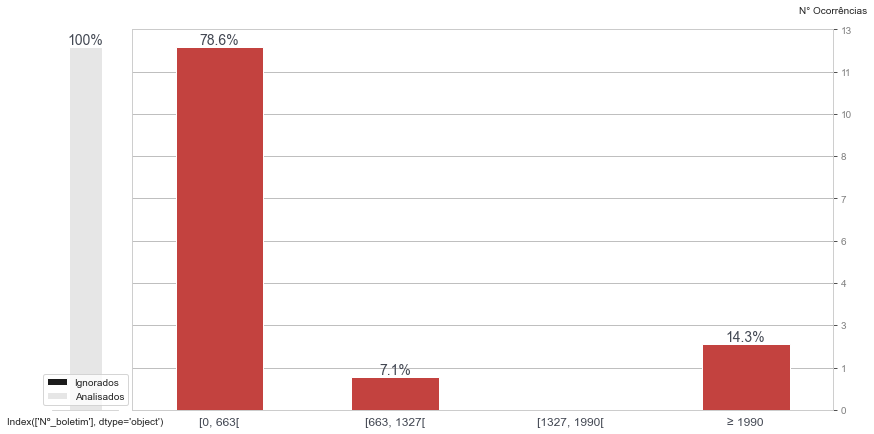

In [4]:
hist = plot.hist(df['Nº_boletim'])

About the histogram structure, the graphic in the center with the red bars is the histogram, the interval description is localized on the x-axis and the number of ocurrencies in the y-axis. The graphic on the left is the total of the analized or desconsidered values.

The function also have other parameters, if you want to add a title, subtitle and legend, you can make it too!

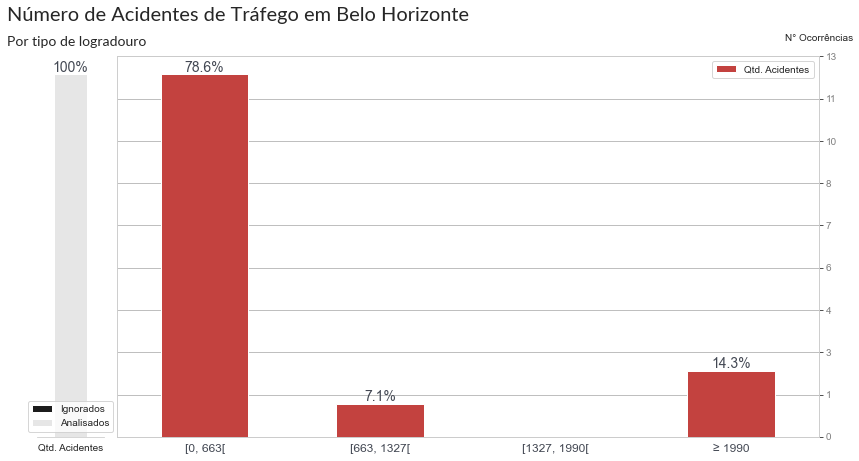

In [5]:
hist = plot.hist(df['Nº_boletim'], title='Número de Acidentes de Tráfego em Belo Horizonte', subtitle='Por Tipo de Logradouro', legenda='Qtd. Acidentes')

Great, now we have a more suitable graphic, but have a few things that we can change to make it more suitable to our data... Lets add a title to the x-axis, a commentary, the source of info and the number of bins we want!

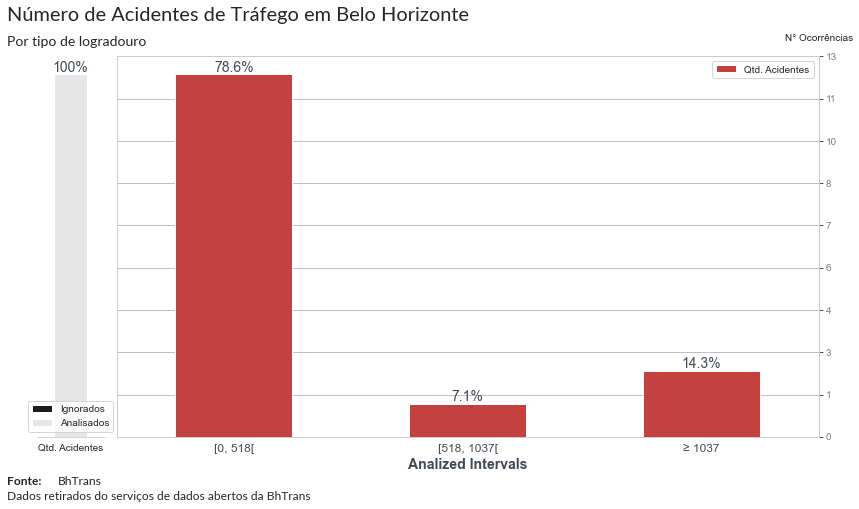

In [6]:
hist = plot.hist(df['Nº_boletim'], title='Número de Acidentes de Tráfego em Belo Horizonte', subtitle='Por Tipo de Logradouro', legenda='Qtd. Acidentes', 
                 xlabel='Analized Intervals', source='BhTrans', comentario='Dados retirados do serviços de dados abertos da BhTrans', 
                 bins=4)

Now, we are almost there, for the final touches, our histogram analizes all the data, so a column for the quota of data is useless, lets remove it and add superior and inferior limits!

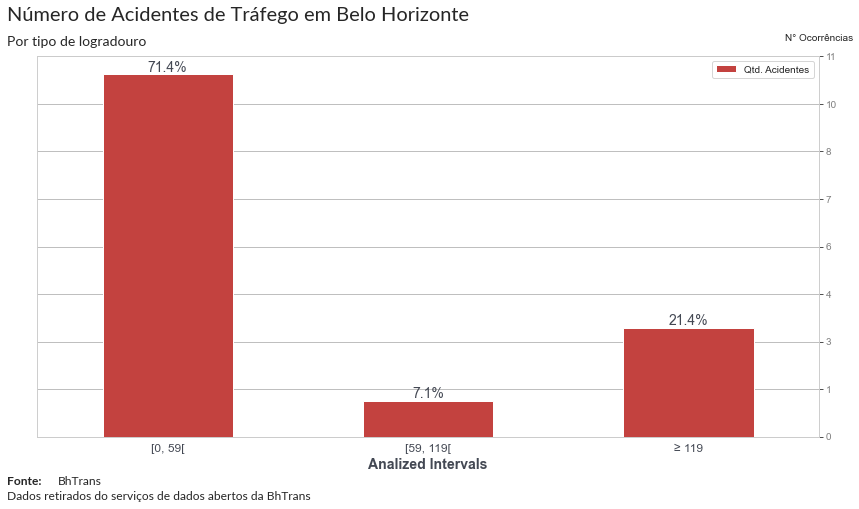

In [7]:
hist = plot.hist(df['Nº_boletim'], title='Número de Acidentes de Tráfego em Belo Horizonte', subtitle='Por Tipo de Logradouro', legenda='Qtd. Acidentes', 
                 xlabel='Analized Intervals', source='BhTrans', comentario='Dados retirados do serviços de dados abertos da BhTrans', 
                 bins=4, lwl=0, upl=200, report_nan=False)

Now that the graphic is showing specifically the info we want, but the display is show % as bar labels and values as y-axis, what if we want to change it, or just show one type of value? The parameter **legend_control** is the responsible to make this ajustments...

Using the **'%V'** parameter...

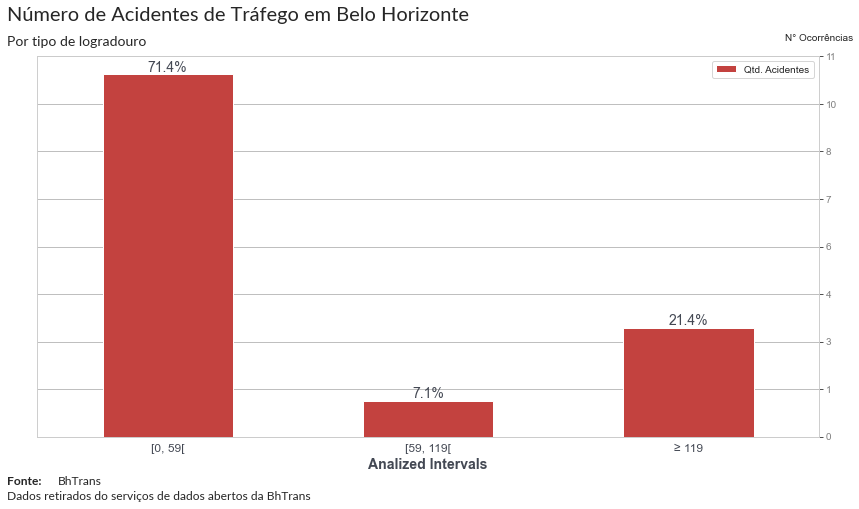

In [8]:
hist = plot.hist(df['Nº_boletim'], title='Número de Acidentes de Tráfego em Belo Horizonte', subtitle='Por Tipo de Logradouro', legenda='Qtd. Acidentes', 
                 xlabel='Analized Intervals', source='BhTrans', comentario='Dados retirados do serviços de dados abertos da BhTrans', 
                 bins=4, lwl=0, upl=200, report_nan=False, legend_control='%V')

Using the **'V%'** parameter...

C:\Users\pcardoso\Documents\projects\SysTool_Production\main\systool\plot.py:157: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_aux.set_yticklabels(['{:.2f}%'.format(tick * 100) for tick in list(ax_aux.get_yticks())], color='grey')


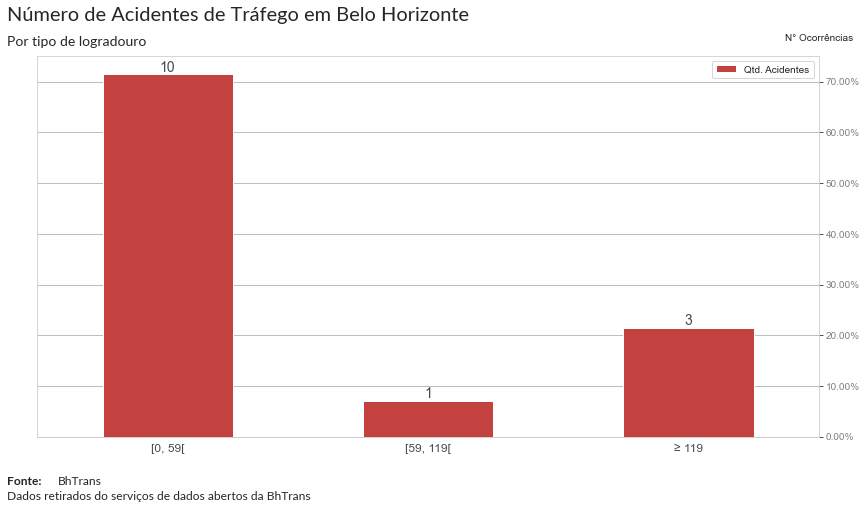

In [9]:
hist = plot.hist(df['Nº_boletim'], title='Número de Acidentes de Tráfego em Belo Horizonte', subtitle='Por Tipo de Logradouro', legenda='Qtd. Acidentes', 
                 xlabel='Analized Intervals', source='BhTrans', comentario='Dados retirados do serviços de dados abertos da BhTrans', 
                 bins=4, lwl=0, upl=200, report_nan=False, legend_control='V%')

Using the **'%'** parameter...

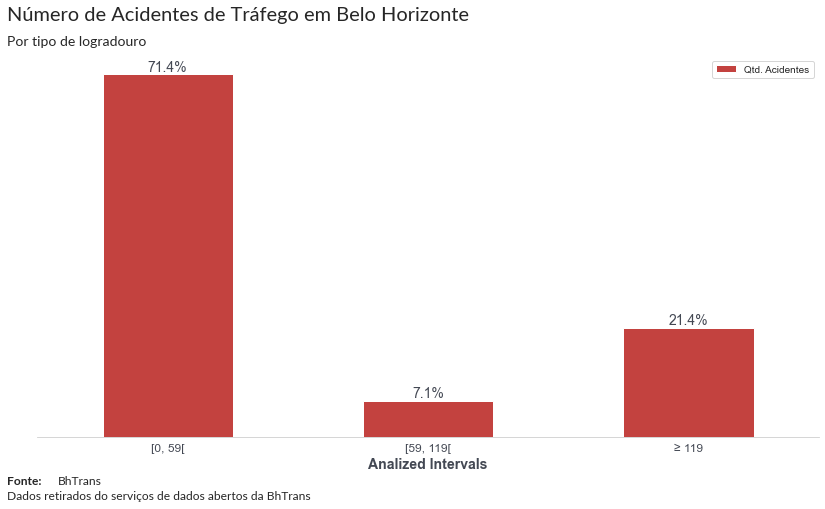

In [10]:
hist = plot.hist(df['Nº_boletim'], title='Número de Acidentes de Tráfego em Belo Horizonte', subtitle='Por Tipo de Logradouro', legenda='Qtd. Acidentes', 
                 xlabel='Analized Intervals', source='BhTrans', comentario='Dados retirados do serviços de dados abertos da BhTrans', 
                 bins=4, lwl=0, upl=200, report_nan=False, legend_control='%')

Using the **'V'** parameter...

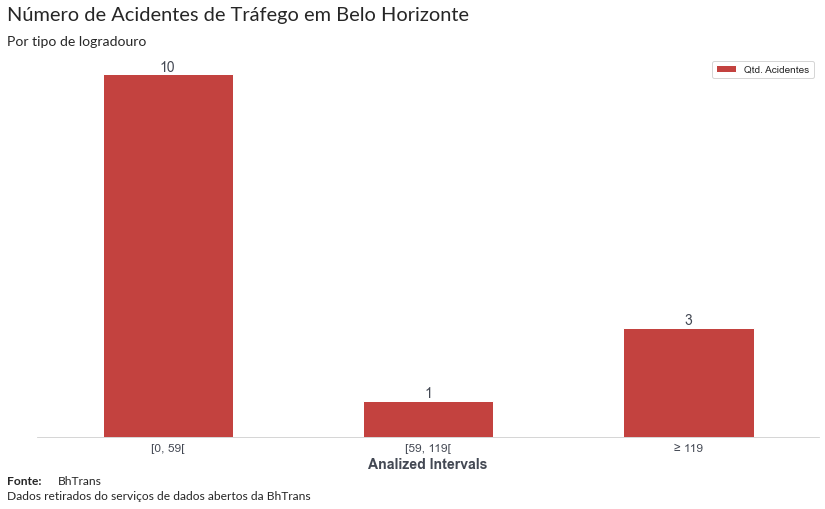

In [11]:
hist = plot.hist(df['Nº_boletim'], title='Número de Acidentes de Tráfego em Belo Horizonte', subtitle='Por Tipo de Logradouro', legenda='Qtd. Acidentes', 
                 xlabel='Analized Intervals', source='BhTrans', comentario='Dados retirados do serviços de dados abertos da BhTrans', 
                 bins=4, lwl=0, upl=200, report_nan=False, legend_control='V')

### <span style="color:blue">**maps**</span>

This function is responsible to generate maps based on inputed GeoDataFrames ao another parameters.

In [12]:
# First lets input the GeoDataFrames we want to use...

gdf_metro_lines = gpd.read_file(r'examples_databases\maps\infraurbana_viario_metro.shp')
gdf_bus_stations = gpd.read_file(r'examples_databases\maps\ESTACAO_ONIBUS.shp')
gdf_bh_regions = gpd.read_file(r'examples_databases\maps\REGIONAL.shp')

In [13]:
gdf_metro_lines.head()

,Name,dir,geometry
0,LINHA 01,1,"LINESTRING Z (610361.347 7808024.202 0.000, 61..."
1,LINHA 02,1,"LINESTRING Z (601581.733 7790635.205 0.000, 60..."
2,LINHA 03,1,"LINESTRING Z (608151.110 7805074.296 0.000, 60..."
3,LINHA 02,2,"LINESTRING Z (601719.968 7790481.647 0.000, 60..."


In [14]:
gdf_bus_stations.head()

,NOME,COUNT_FIG,geometry
0,ESPIRITO SANTO,280,POINT (611249.688 7797463.545)
1,TAMOIOS,537,POINT (610680.639 7797027.345)
2,CARIJOS,755,POINT (610713.422 7797148.114)
3,TUPINAMBAS,415,POINT (610746.521 7797290.475)
4,MINAS CAIXA,550,POINT (608842.127 7808971.477)


In [15]:
gdf_bh_regions.head()

,NOME,POPULAÇÃO,geometry
0,NORTE,214967,"POLYGON ((610664.696 7810547.620, 610665.826 7..."
1,NORDESTE,281507,"POLYGON ((617643.241 7808804.954, 617643.266 7..."
2,LESTE,228986,"POLYGON ((614131.588 7801831.387, 614134.078 7..."
3,BARREIRO,282156,"POLYGON ((603996.598 7793168.575, 604042.766 7..."
4,OESTE,316908,"POLYGON ((601819.213 7795179.287, 601822.668 7..."


To do the Plot, you just need to add the geodataframes data inside a list in the parameter **shapes**...

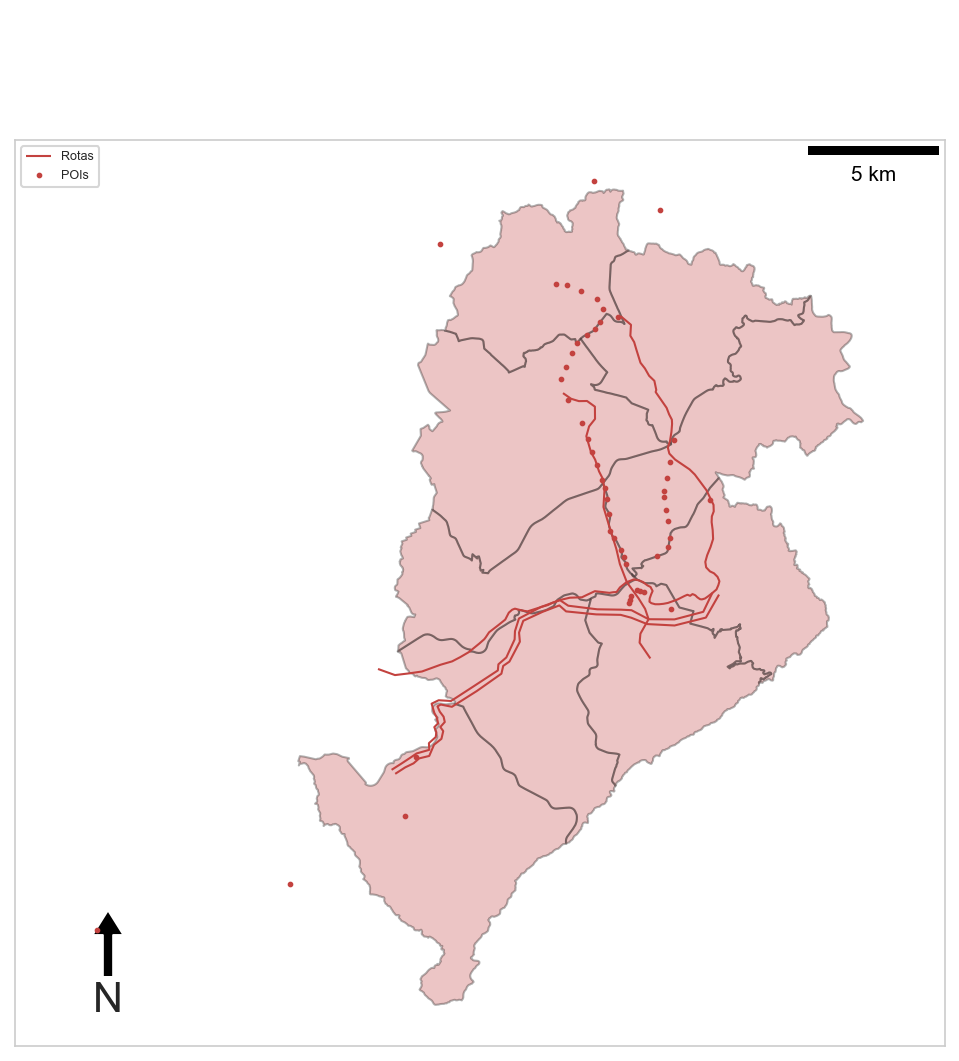

In [16]:
fig = plot.mapa(shapes=[gdf_bh_regions, gdf_bus_stations, gdf_metro_lines])

But, in this case we just inputed shapefiles, but if we need to import a csv, you have to add the **coords** parameter with the name of the columns that have the data.

In [17]:
# Lets get the new DataFrame...

gdf_metro_station = pd.read_csv(r'examples_databases\maps\ESTACAO_METRO.csv', sep=';')
gdf_metro_station.head()

,NOME,LINHA_METRO,LAT,LON,COUNT_FIG
0,WALDOMIRO LOBO,LINHA 1,7805008.934,611759.6136,715
1,PRIMEIRO DE MAIO,LINHA 1,7803898.240,611611.8398,194
2,FLORAMAR,LINHA 1,7806505.919,610967.8888,546
3,VILARINHO,LINHA 1,7807967.981,610241.7103,31
4,SAO GABRIEL,LINHA 1,7803304.980,612427.7166,681


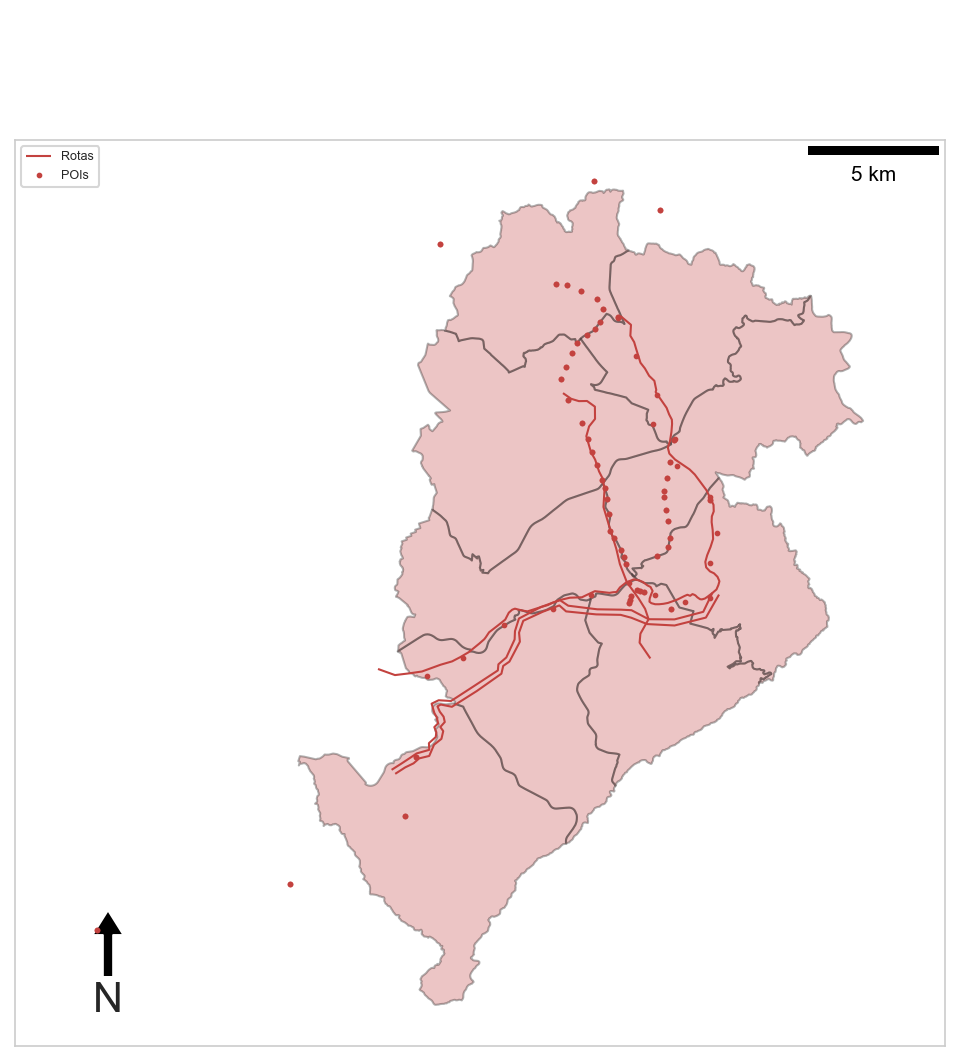

In [18]:
fig = plot.mapa(shapes=[gdf_bh_regions, gdf_bus_stations, gdf_metro_lines, gdf_metro_station], coords=['LAT', 'LON'])

You can also chose if you want to color some specific geometry by passing the color you want or the column of the GeoDataFrame to color based on the field values...

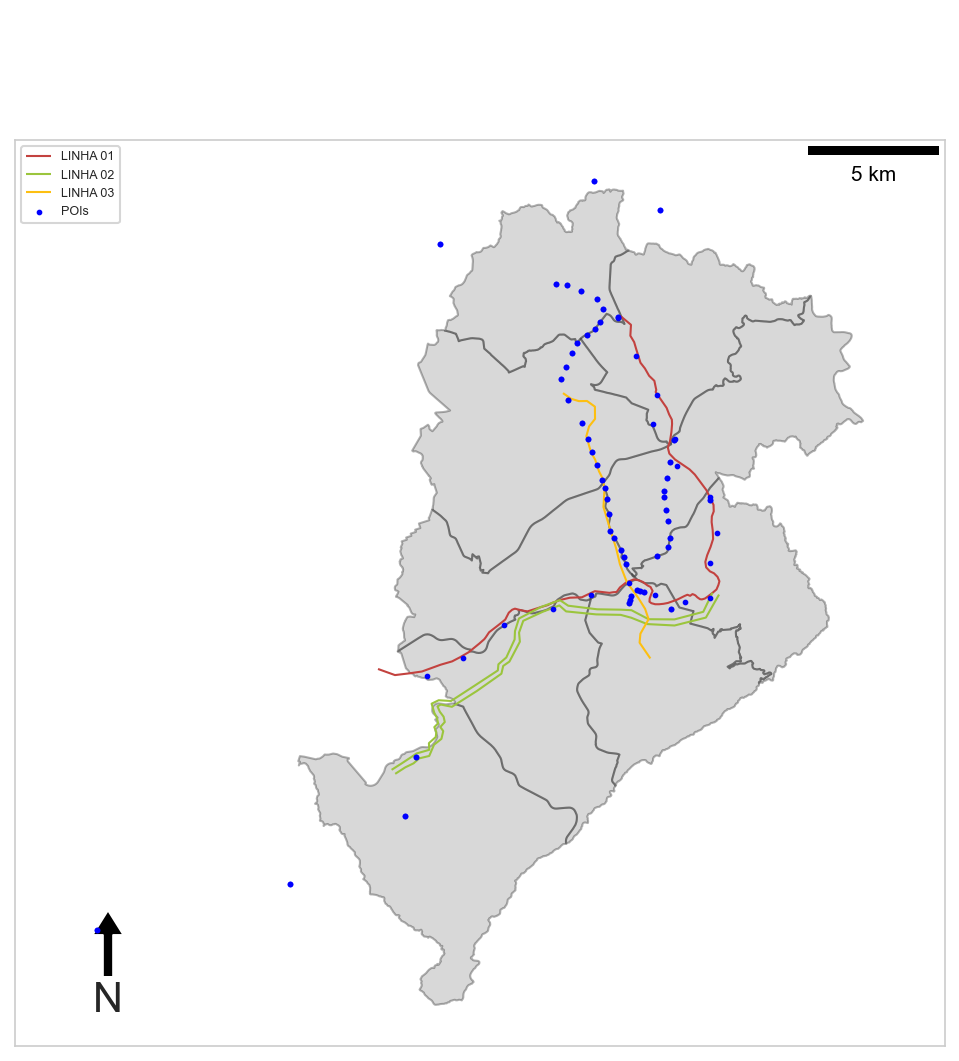

In [19]:
fig = plot.mapa(shapes=[gdf_bh_regions, gdf_bus_stations, gdf_metro_lines, gdf_metro_station], coords=['LAT', 'LON'], col_pts='blue', col_lin='Name', col_zns='grey')

If you want to add a cloropletic variation based on each zone attribute, you just have to add in the **col_zns** the column of this attribute, and the new paramether **heat** with the color scale you want... Let's do that, add a title and subtitle too, if you also add a **path** you can make an output file!

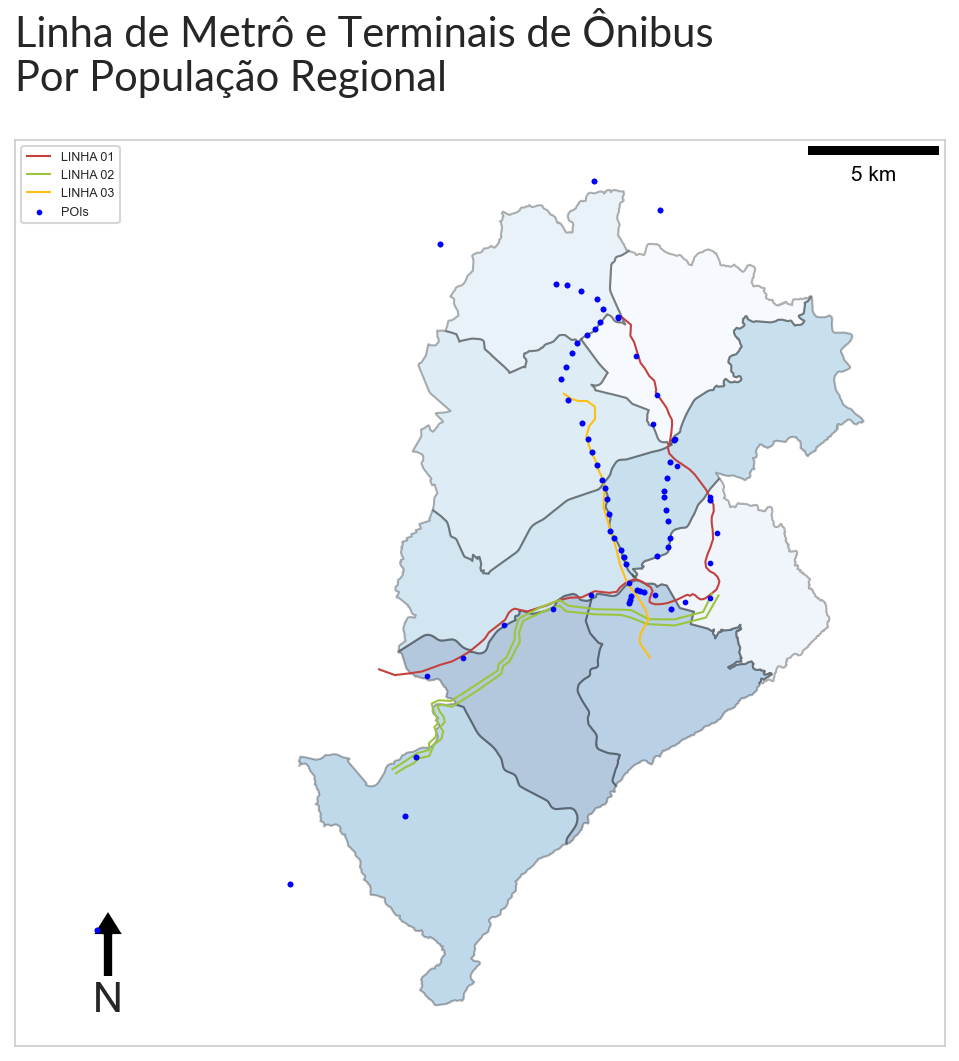

In [20]:
fig = plot.mapa(shapes=[gdf_bh_regions, gdf_bus_stations, gdf_metro_lines, gdf_metro_station], 
                coords=['LAT', 'LON'], col_pts='blue', col_lin='Name', col_zns='POPULAÇÃO', heat='Blues',
                title='Linha de Metrô e Terminais de Ônibus', subtitle='Por População Regional',
                path=r'examples_databases\maps')

The function also have other parameters:
- **dir2dashed** and **dir_col**: Both param used to plot lines that have two directions, **dir2dashed** True if have two directions, and the name of the column with the direction fied 1 or 2 for each direction.
- **col_size**: Parameter to indicate a classification column that you want increase or decrease the markersize by the value.

In [21]:
# Lets see an example for a line with double direction...

gdf_2dir = gpd.read_file(r'examples_databases\maps\lin2dir.shp')
gdf_2dir.head()

,id,dir,geometry
0,1,1,"LINESTRING (0.52151 -1.17210, 0.44329 -1.16167..."
1,1,2,"LINESTRING (0.52119 -1.17275, 0.70372 -1.07888..."


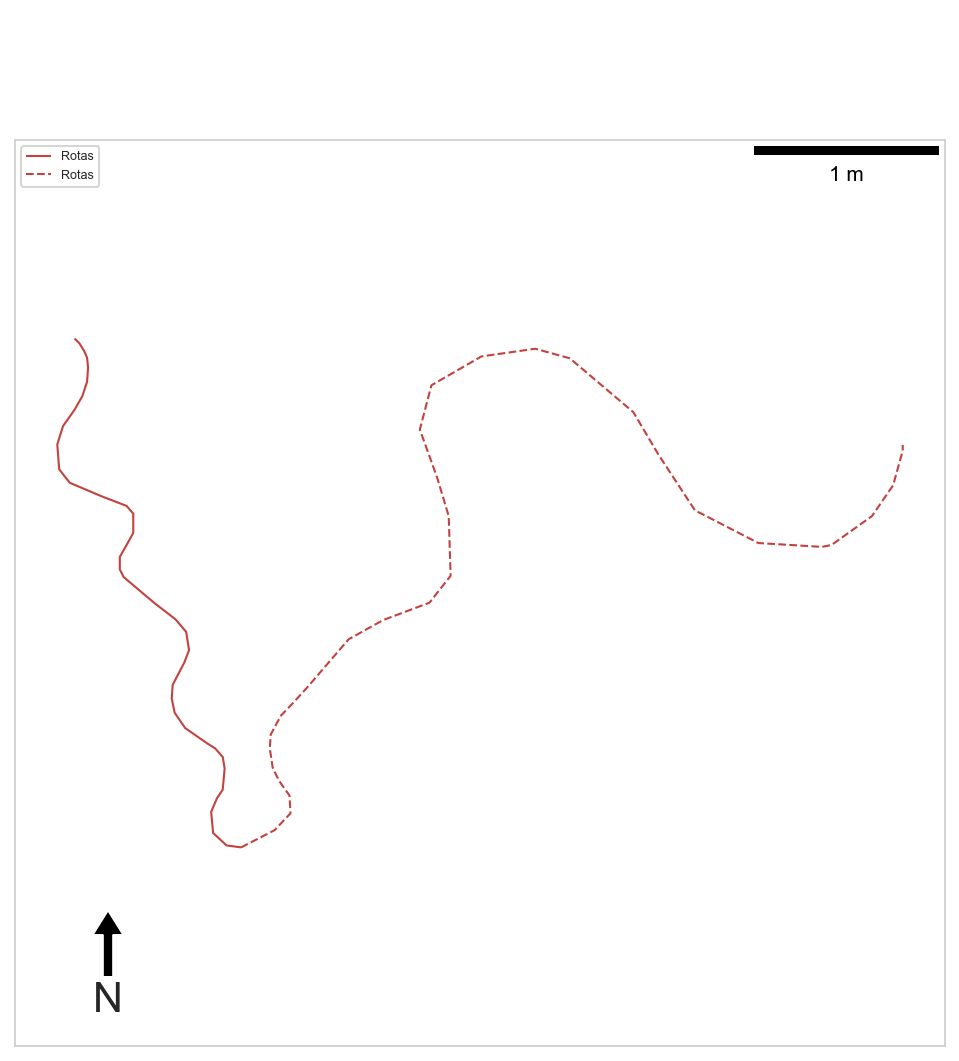

In [22]:
# The dir one will alway be the entire line, the dir two will be always the dashed one.

fig = plot.mapa(shapes=[gdf_2dir], dir2dashed=True, dir_col='dir')

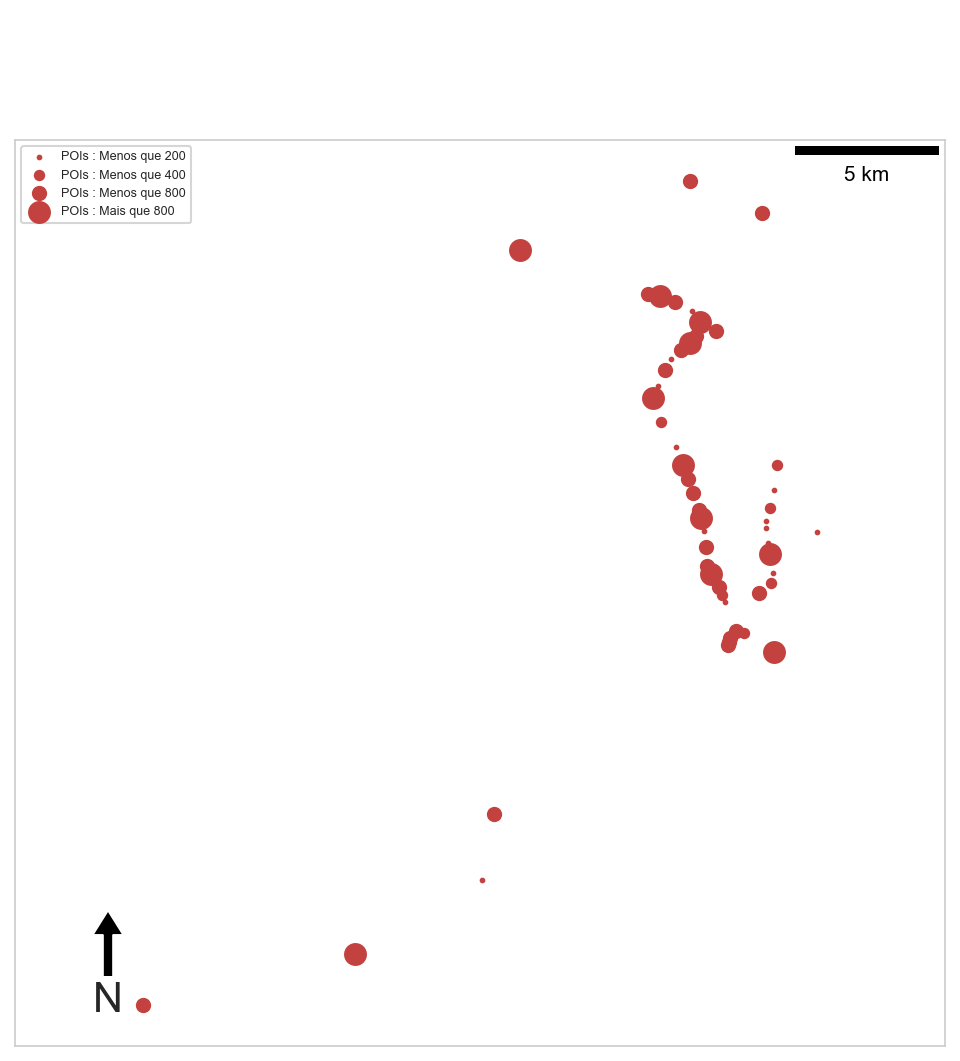

In [23]:
# Using the col_size parameter...

fig = plot.mapa(shapes=[gdf_bus_stations], col_size='COUNT_FIG')

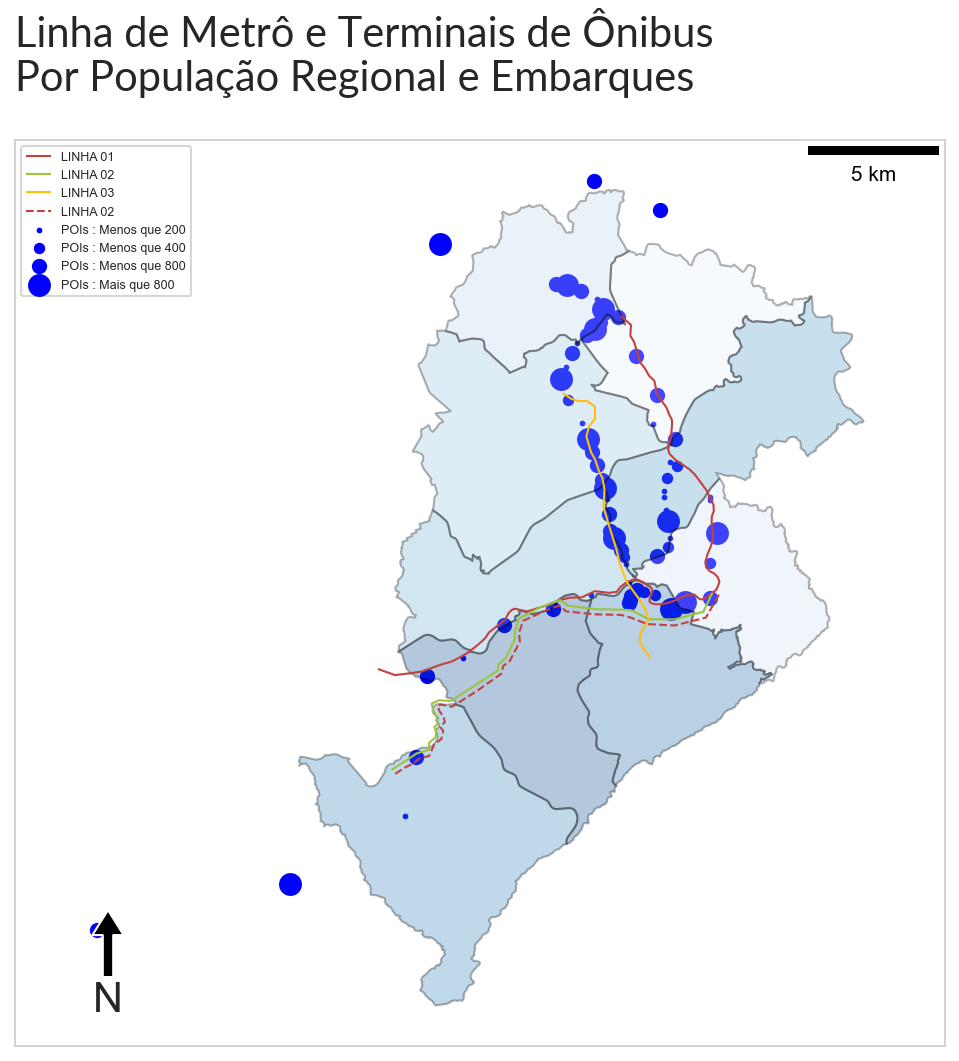

In [24]:
# Now, lets see them all together in a pretty map!

fig = plot.mapa(shapes=[gdf_bh_regions, gdf_bus_stations, gdf_metro_lines, gdf_metro_station], 
                coords=['LAT', 'LON'], col_pts='blue', col_lin='Name', col_zns='POPULAÇÃO', heat='Blues',
                title='Linha de Metrô e Terminais de Ônibus', subtitle='Por População Regional e Embarques',
                path=r'examples_databases\maps', col_size='COUNT_FIG', dir2dashed=True, dir_col='dir')

### <span style="color:blue">**plot_sidemap**</span>

This function objective is to plot two previous generated maps side by side.

It have 3 parameters:

- **map_left**: The matplotlib figure type with the map you want to be on the left side.
- **map_right**: The matplotlib figure type with the map you want to be on the right side.
- **file_name**: String value with the path and file name of the exported new figure.

To show it funcionalities, lets use 2 previous showed maps, a generic colors map, and a most specific map side-by-side.

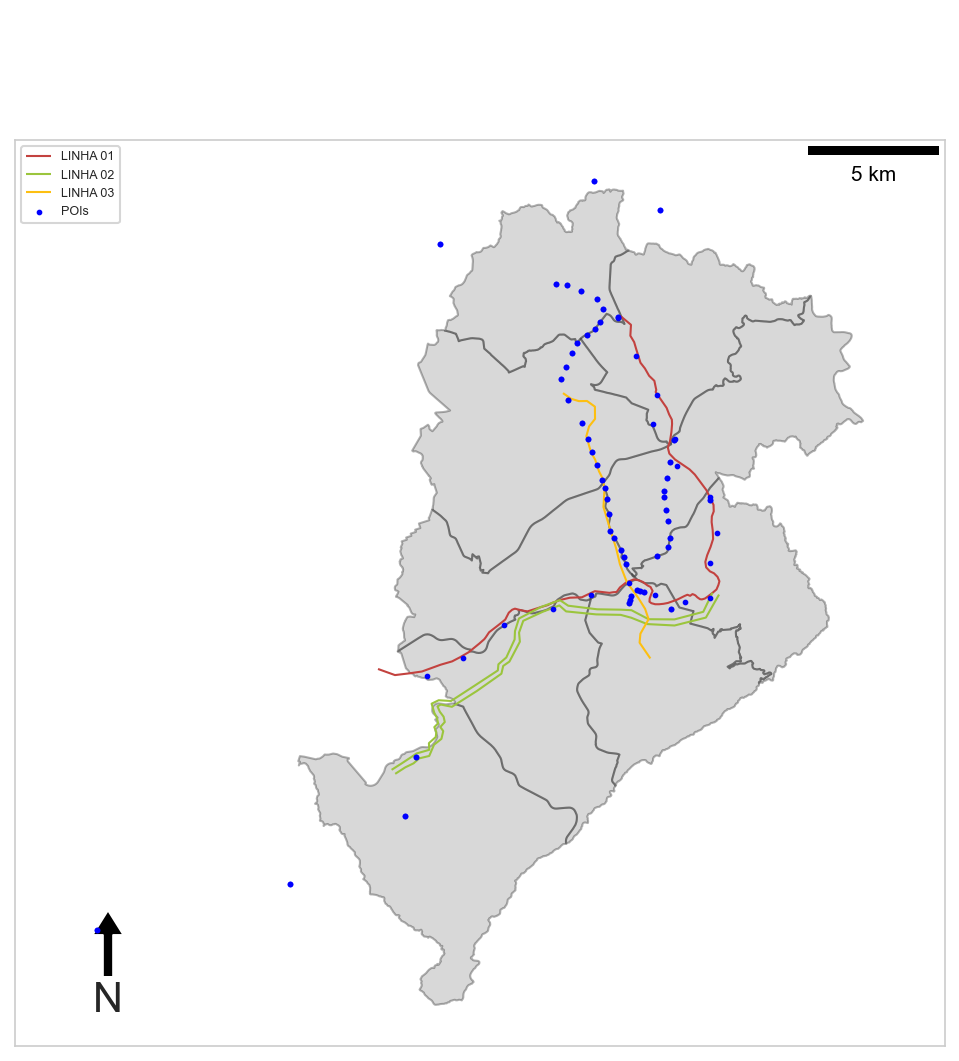

In [25]:
map_left = plot.mapa(shapes=[gdf_bh_regions, gdf_bus_stations, gdf_metro_lines, gdf_metro_station], coords=['LAT', 'LON'], col_pts='blue', col_lin='Name', col_zns='grey')

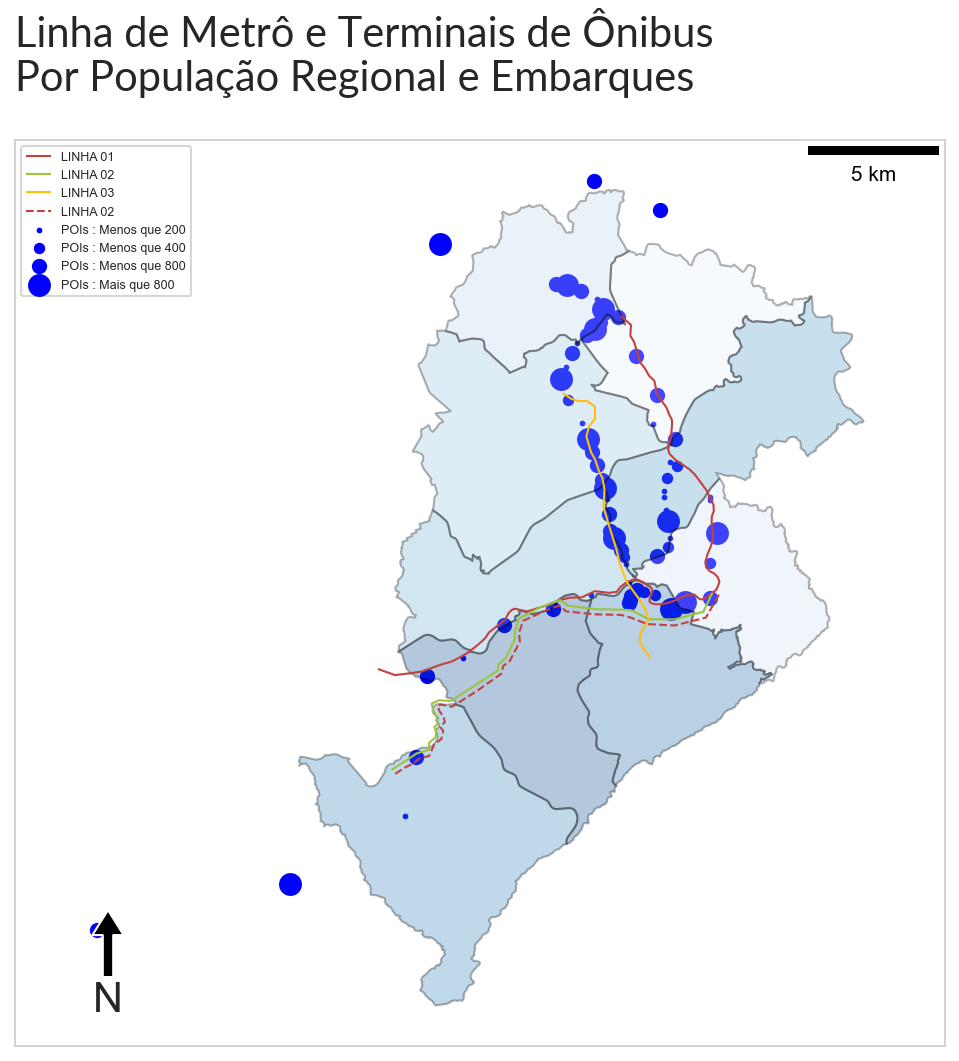

In [26]:
map_right = plot.mapa(shapes=[gdf_bh_regions, gdf_bus_stations, gdf_metro_lines, gdf_metro_station], 
                      coords=['LAT', 'LON'], col_pts='blue', col_lin='Name', col_zns='POPULAÇÃO', heat='Blues',
                      title='Linha de Metrô e Terminais de Ônibus', subtitle='Por População Regional e Embarques',
                      path=r'examples_databases\maps', col_size='COUNT_FIG', dir2dashed=True, dir_col='dir')

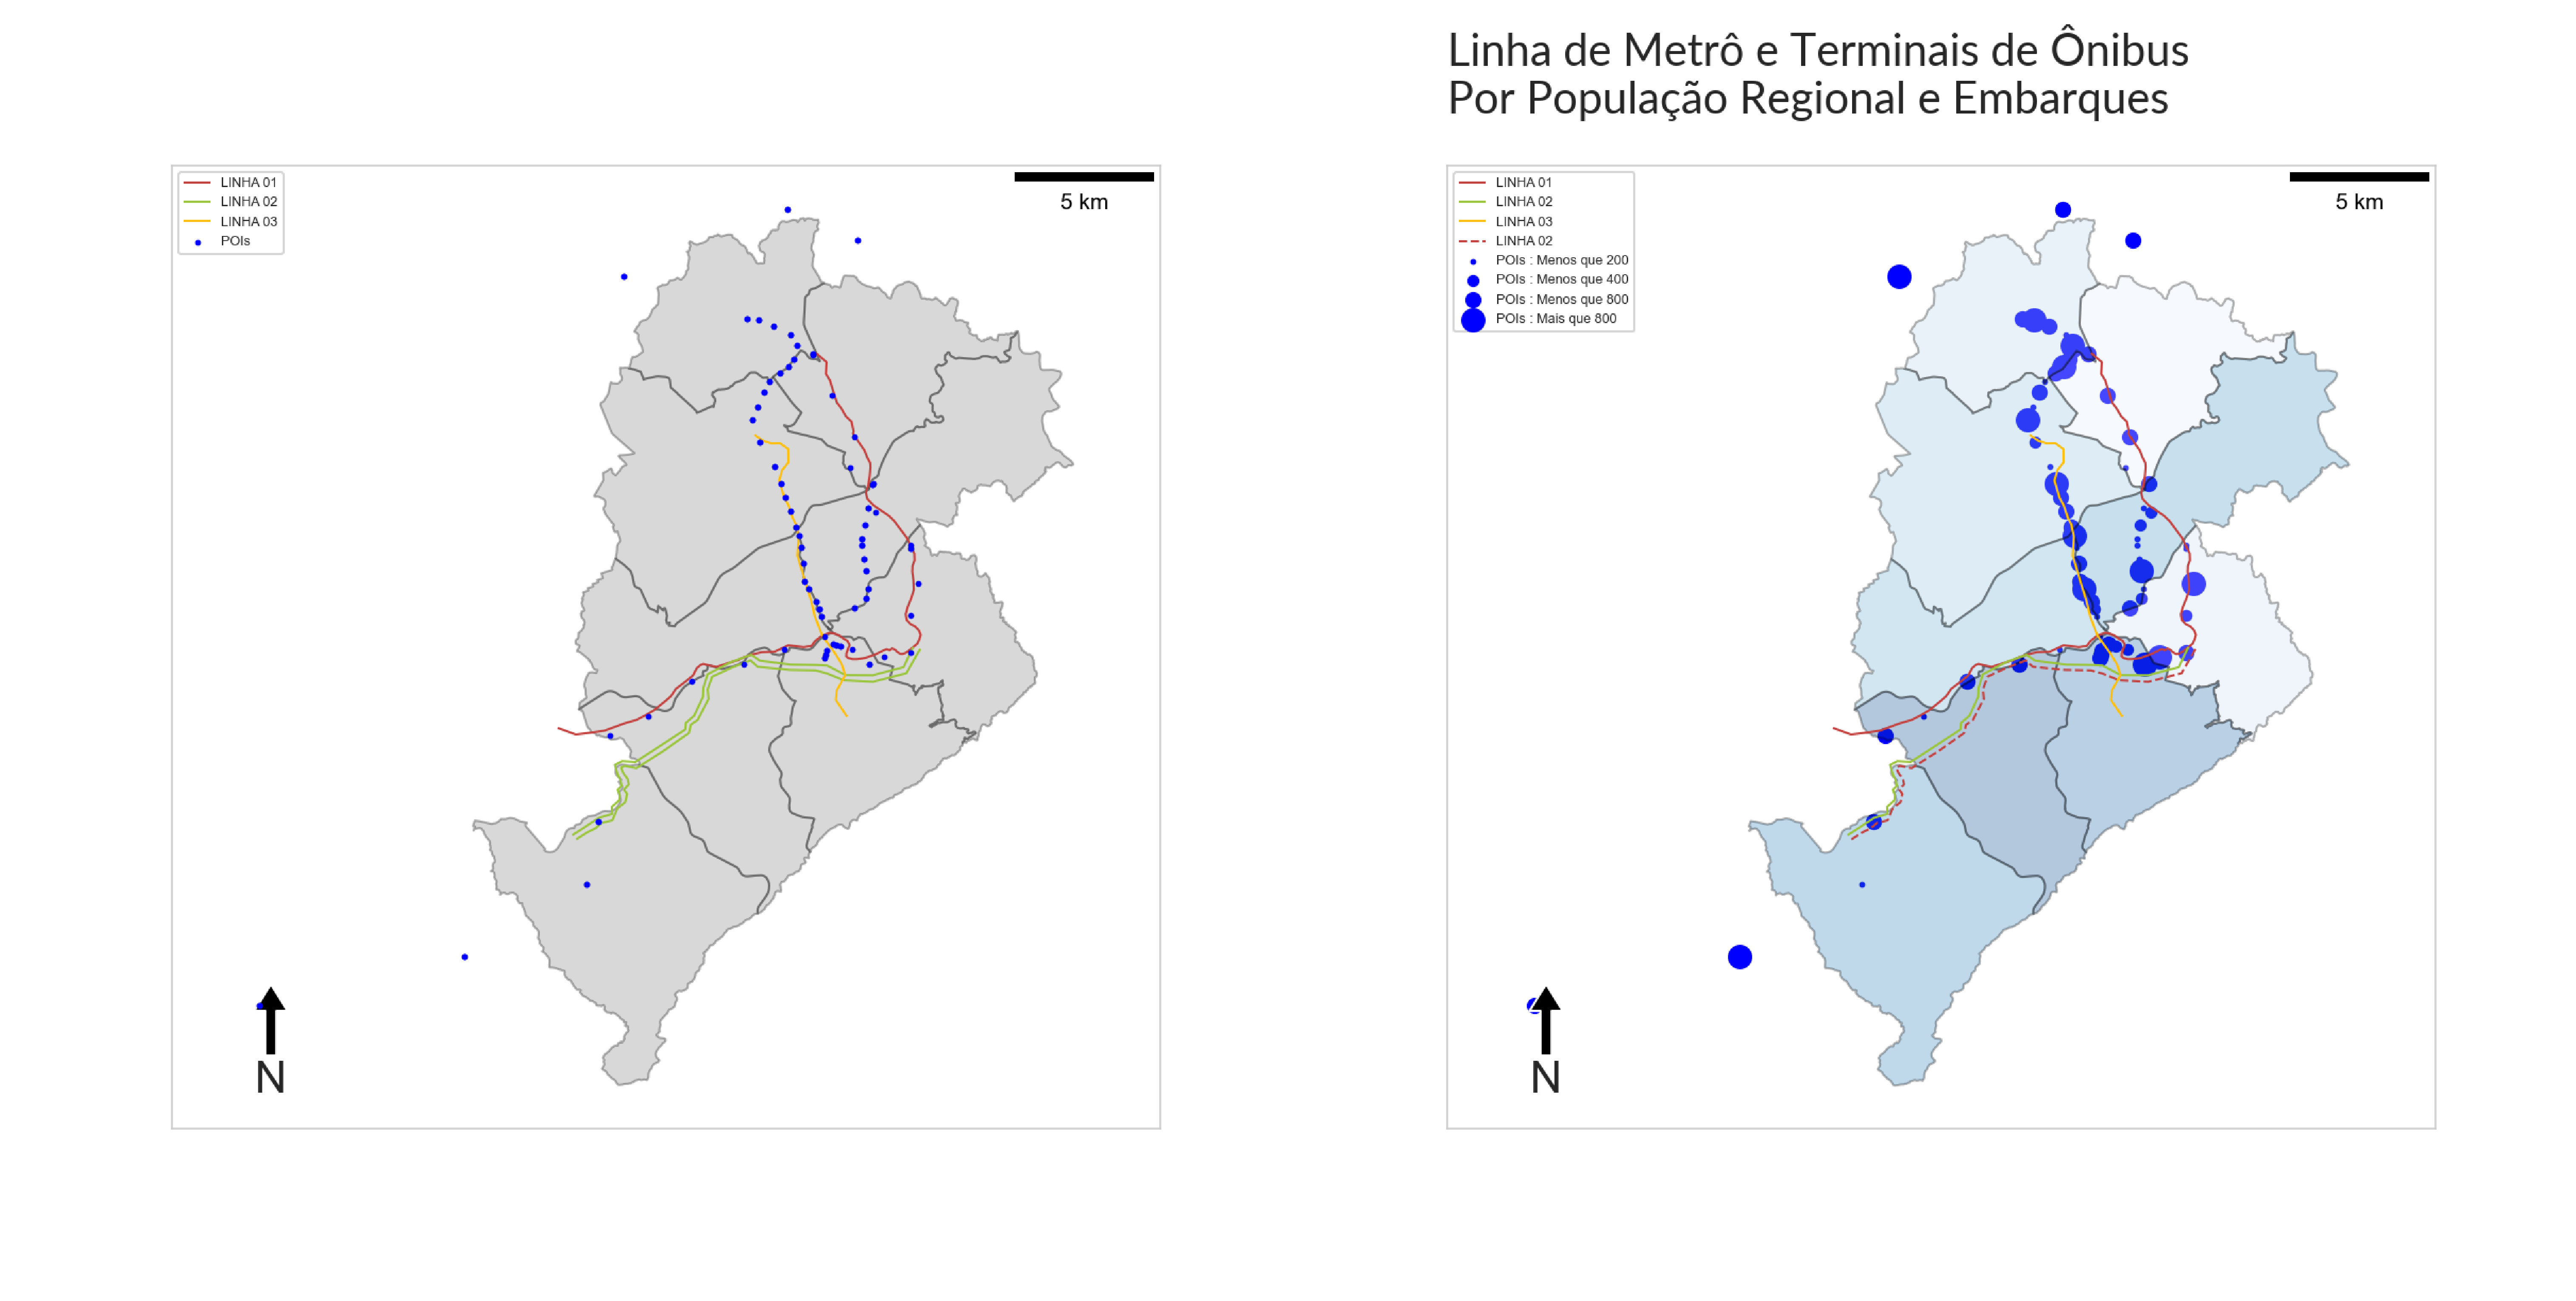

In [27]:
sidemap = plot.plot_sidemap(map_left, map_right)